unsupervised machine learning ;k=>clustering algorithm ;k={2,3,4,10,11,12,20,25};k1={2,3,4};k2={10,11,12,20,25,30} as m1=4 and m2=12 where k1 and k2 are the number closest to m1 and m2 respectively.
m1'(avg of elements of k1)=3  and m2'(avg of elements of k2)=18
k1'={2,3,4,10} and k2'={11,12,20,25,30}
m1''=4.75(5)  and m2''=19.6(20)
k1''={2,3,4,5,10,11,12} and k2''={20,25,30}
m1'''=7 and m2'''=25
k1'''={2,3,4,10,11,12} and k2'''={20,25,30}
m1''''=7 and m2''''=25

NOW WE GOT SAME VALUE OF RECENT m AND k TO THE PREVIOUS m AND k.SO WE CAN STOP NOW.

In [4]:
from sklearn.cluster import KMeans#its a built in class to bring the cluster method in sklearn
import  pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("Sdf=pd.read_csv("S:\cluster.csv")
df.head():\cluster.csv")
df.head()

,Name,age,income
0,gfh,52,20000
1,efrgh,25,25000
2,edfgdfh,65,30000
3,dfg,25,31000
4,deafrg,45,24000


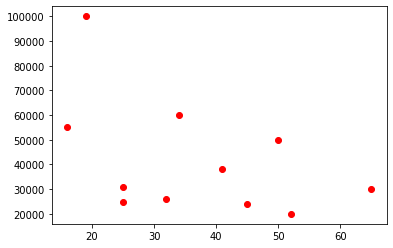

In [11]:
plt.scatter(df['age'],df['income'],color='red')

In [19]:
km=KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
y_predicted=km.fit_predict(df[['age','income']])#In unsupervised leaning no training is required but in supervised learning we need training and testing
y_predicted

array([3, 3, 0, 0, 3, 3, 0, 2, 2, 2, 1])

In [12]:
df['Cluster']=y_predicted
df.head()#to generate a 4 coloumn table including the cluster

,Name,age,income,Cluster
0,gfh,52,20000,3
1,efrgh,25,25000,3
2,edfgdfh,65,30000,0
3,dfg,25,31000,0
4,deafrg,45,24000,3


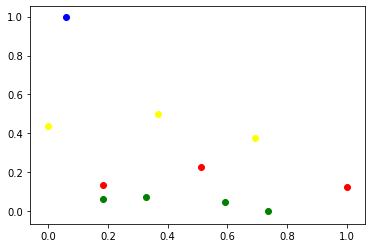

In [16]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]
plt.scatter(df1['age'],df1['income'],color='red')
plt.scatter(df2['age'],df2['income'],color='blue')
plt.scatter(df3['age'],df3['income'],color='yellow')
plt.scatter(df4['age'],df4['income'],color='green')

In [24]:
scaler=MinMaxScaler()
scaler.fit(df[['income']])
df['income']=scaler.transform(df[['income']])

scaler.fit(df[['age']])
df['age']=scaler.transform(df[['age']])
df

,Name,age,income,Cluster
0,gfh,0.734694,0.0000,3
1,efrgh,0.183673,0.0625,3
2,edfgdfh,1.000000,0.1250,0
3,dfg,0.183673,0.1375,0
4,deafrg,0.591837,0.0500,3
5,dafgh,0.326531,0.0750,3
6,sdfsg,0.510204,0.2250,0
7,defrgh,0.693878,0.3750,2
8,sdwefgdhf,0.367347,0.5000,2
9,sdefrgh,0.000000,0.4375,2


In [25]:
km=KMeans(n_clusters=4)
y_predicted=km.fit_predict(df[['age','income']])
y_predicted

array([2, 0, 2, 0, 2, 0, 0, 2, 3, 3, 1])

In [26]:
df['Cluster']=y_predicted
df

,Name,age,income,Cluster
0,gfh,0.734694,0.0000,2
1,efrgh,0.183673,0.0625,0
2,edfgdfh,1.000000,0.1250,2
3,dfg,0.183673,0.1375,0
4,deafrg,0.591837,0.0500,2
5,dafgh,0.326531,0.0750,0
6,sdfsg,0.510204,0.2250,0
7,defrgh,0.693878,0.3750,2
8,sdwefgdhf,0.367347,0.5000,3
9,sdefrgh,0.000000,0.4375,3


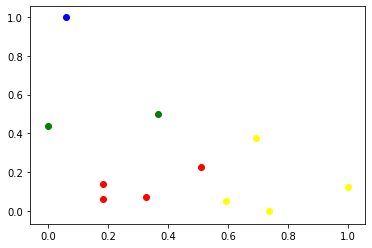

In [27]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]
plt.scatter(df1['age'],df1['income'],color='red')
plt.scatter(df2['age'],df2['income'],color='blue')
plt.scatter(df3['age'],df3['income'],color='yellow')
plt.scatter(df4['age'],df4['income'],color='green')

In [28]:
km.cluster_centers_

array([[0.30102041, 0.125     ],
       [0.06122449, 1.        ],
       [0.75510204, 0.1375    ],
       [0.18367347, 0.46875   ]])

Text(0, 0.5, 'income')

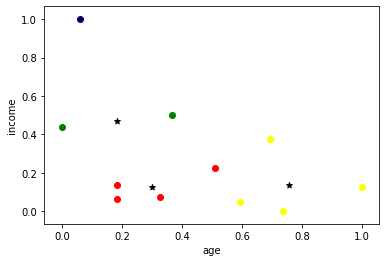

In [31]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]

plt.scatter(df1['age'],df1['income'],color='red')
plt.scatter(df2['age'],df2['income'],color='blue')
plt.scatter(df3['age'],df3['income'],color='yellow')
plt.scatter(df4['age'],df4['income'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')

plt.xlabel('age')
plt.ylabel('income')

In [36]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','income']])
    sse.append(km.inertia_)

In [37]:
sse

[1.8441765268259438,
 0.9426968363876164,
 0.4876364275301957,
 0.31428513076148823,
 0.2020543089684854,
 0.11979413959461335,
 0.0564066621546578,
 0.028288690476190453,
 0.014266581632653052]

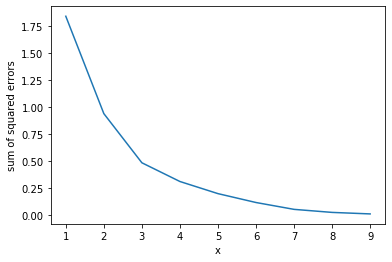

In [38]:
plt.xlabel('x')
plt.ylabel('sum of squared errors')
plt.plot(k_rng,sse)